In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 데이터 불러오기 

In [9]:
# 제일 왼쪽 열 index 설정. index_col 파라미터 사용
tel = pd.read_csv('./telecom_users.csv', index_col=0)
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### 데이터 구성 파악하기

In [10]:
# tel 데이터셋 크기 
tel.shape

(5986, 21)

In [11]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [12]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


### 데이터 전처리하기

* SeniorCitizen 칼럼값들 int -> str 형변환

In [37]:
df = tel.copy()
df = df.astype({'SeniorCitizen': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   object 
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [38]:
# 자료형이 object인 칼럼들만 추출 
cols = list(df.columns)

ObjCols = []
for i in cols:
    if df[i].dtype == object:
        ObjCols.append(i)
        
ObjCols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [39]:
# 자료형이 object인 칼럼들의 unique value 파악하기
for i in ObjCols:
    print(i)
    print(df[i].unique())
    print()

customerID
['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']

gender
['Male' 'Female']

SeniorCitizen
['0' '1']

Partner
['Yes' 'No']

Dependents
['Yes' 'No']

PhoneService
['Yes' 'No']

MultipleLines
['Yes' 'No' 'No phone service']

InternetService
['No' 'Fiber optic' 'DSL']

OnlineSecurity
['No internet service' 'No' 'Yes']

OnlineBackup
['No internet service' 'Yes' 'No']

DeviceProtection
['No internet service' 'Yes' 'No']

TechSupport
['No internet service' 'No' 'Yes']

StreamingTV
['No internet service' 'Yes' 'No']

StreamingMovies
['No internet service' 'No' 'Yes']

Contract
['Two year' 'Month-to-month' 'One year']

PaperlessBilling
['No' 'Yes']

PaymentMethod
['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']

TotalCharges
['1734.65' '3973.2' '2869.85' ... '306.05' '1200.15' '457.3']

Churn
['No' 'Yes']



* Contract 칼럼 데이터 간소하게 아래와 같이 변경
```
'Two year' -> TY
'Month-to-month' -> MM
'One year' -> OY
```

In [40]:
df['Contract'] = df['Contract'].replace('Two year', 'TY')
df['Contract'] = df['Contract'].replace('Month-to-month', 'MM')
df['Contract'] = df['Contract'].replace('One year', 'OY')
df['Contract'].unique()

array(['TY', 'MM', 'OY'], dtype=object)

* PaymentMethod 칼럼 데이터 간소하게 아래와 같이 변경 
```
'Credit card (automatic)' -> CC
'Bank transfer (automatic)' -> BT
'Electronic check' -> EC
'Mailed check' -> MC
```

In [41]:
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'CC')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'BT')
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'EC')
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 'MC')
df['PaymentMethod'].unique()

array(['CC', 'BT', 'EC', 'MC'], dtype=object)

### distplot, histplot, barplot, pairplot 등으로 데이터 분포 확인
* https://www.kaggle.com/guptakush/telecommunication-data-analysis 참고

In [42]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

성별 데이터 분석

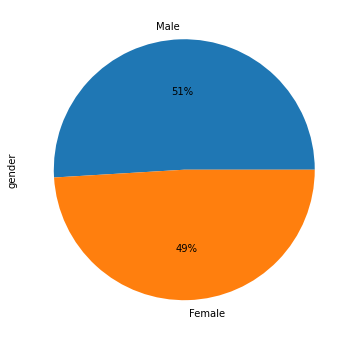

In [43]:
gender=df["gender"].value_counts()
plt.figure(figsize=(8,6))
plot=gender.plot.pie(autopct="%1.0f%%")
plt.show()
#남자 51%와 여자 49프로로 구성되어있다. 

결혼 여부 분석

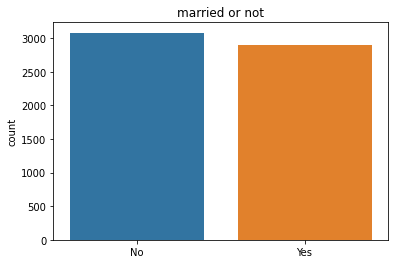

In [44]:
married=df['Partner'].value_counts()
plt.title('married or not')
plt.ylabel('count')
sns.barplot(x=married.index,y=married.values)
plt.show()

사용연수 분석

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


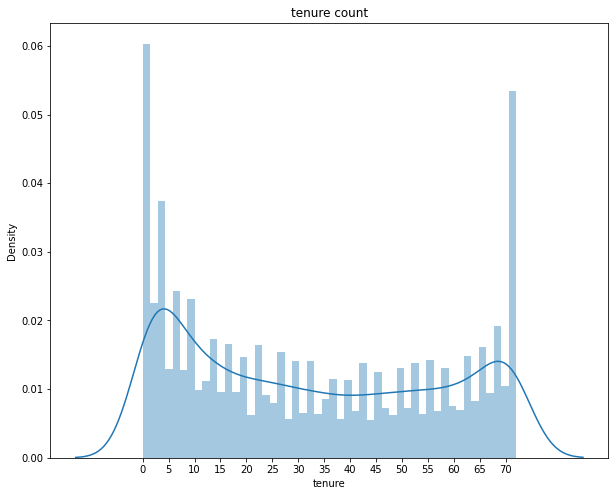

In [45]:
tenure = df['tenure']
plt.figure(figsize=(10,8))
sns.distplot(tenure, bins=50, hist=True)
plt.xticks(list(range(0,tenure.max(),5)))
#plt.yticks(list(range(0,550,50)))
plt.title('tenure count')
plt.show()

핸드폰 개통 손님 분석

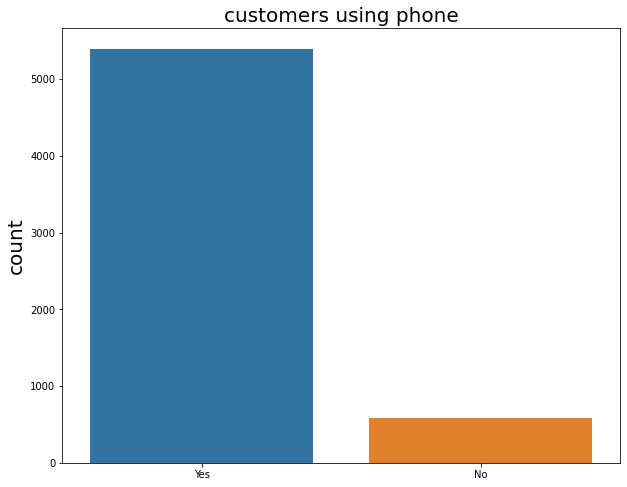

In [46]:
phone_services=df['PhoneService'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=phone_services.index,y=phone_services.values)
plt.ylabel('count',size=20)
plt.title('customers using phone',size=20)
plt.show()

고객 계약 데이터 분석
<br>
'Two year' -> TY
<br>
'Month-to-month' -> MM
<br>
'One year' -> OY

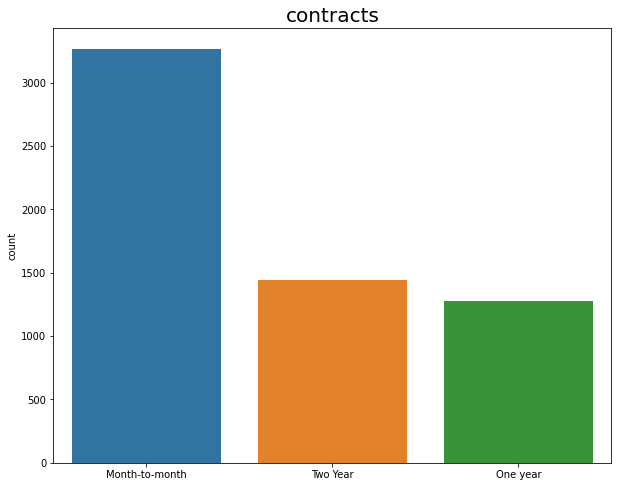

In [47]:
contract=df['Contract'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(y=contract.values,x=contract.index)
plt.title('contracts',size=20)
plt.xticks([0,1,2],['Month-to-month','Two Year','One year'])
plt.ylabel('count')
plt.show()

paperless billing을 사용하는 고객의 수 데이터 분석

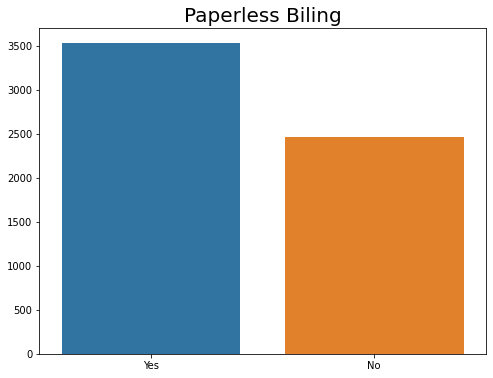

In [48]:
billing=df['PaperlessBilling'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=billing.index,y=billing.values)
plt.title('Paperless Biling',size=20)
plt.show()

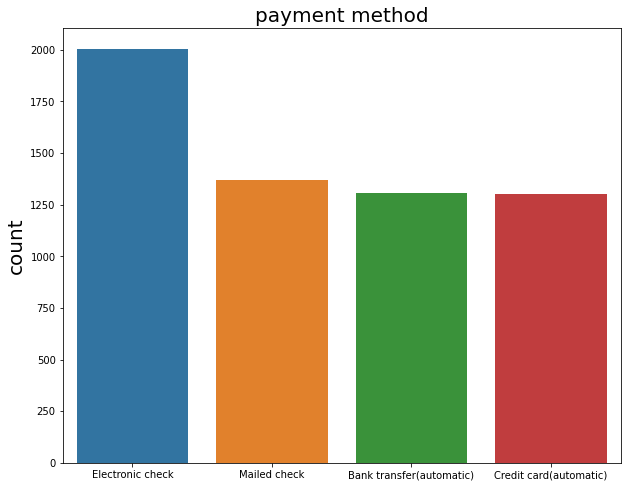

In [49]:
pmt=df['PaymentMethod'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=pmt.index,y=pmt.values)
plt.title('payment method',size=20)
plt.ylabel('count',size=20)
plt.xticks([0,1,2,3],['Electronic check','Mailed check',
                      'Bank transfer(automatic)','Credit card(automatic)'])
plt.show()

고객 사용금액 데이터 분석

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


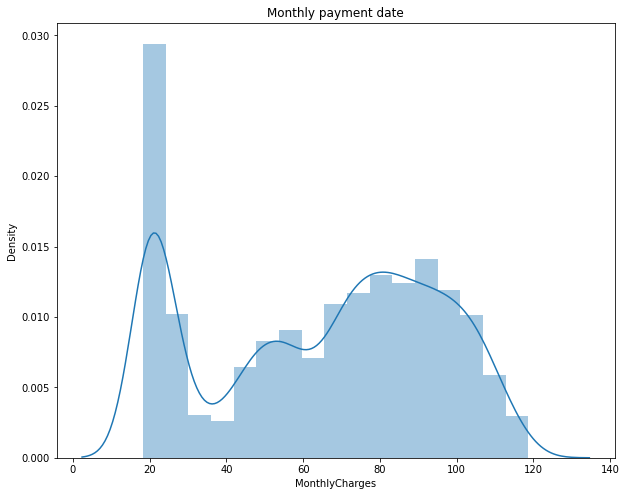

In [50]:
charges=df['MonthlyCharges']
plt.figure(figsize=(10,8))
sns.distplot(charges)
plt.title('Monthly payment date')
plt.show()

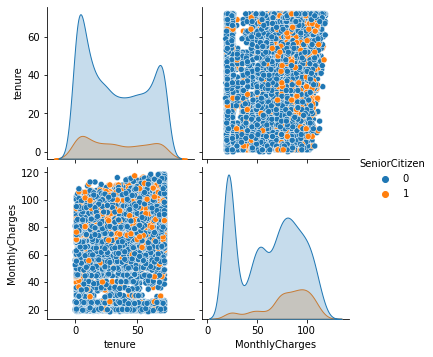

In [51]:
sns.pairplot(tel,hue = 'SeniorCitizen')

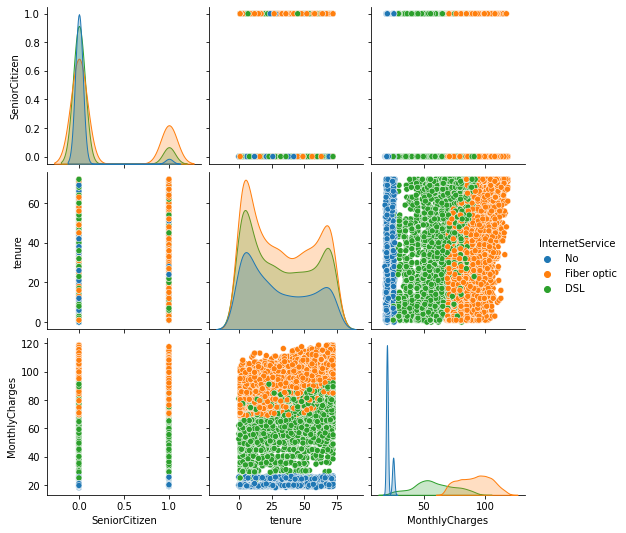

In [52]:
sns.pairplot(tel,hue = 'InternetService')

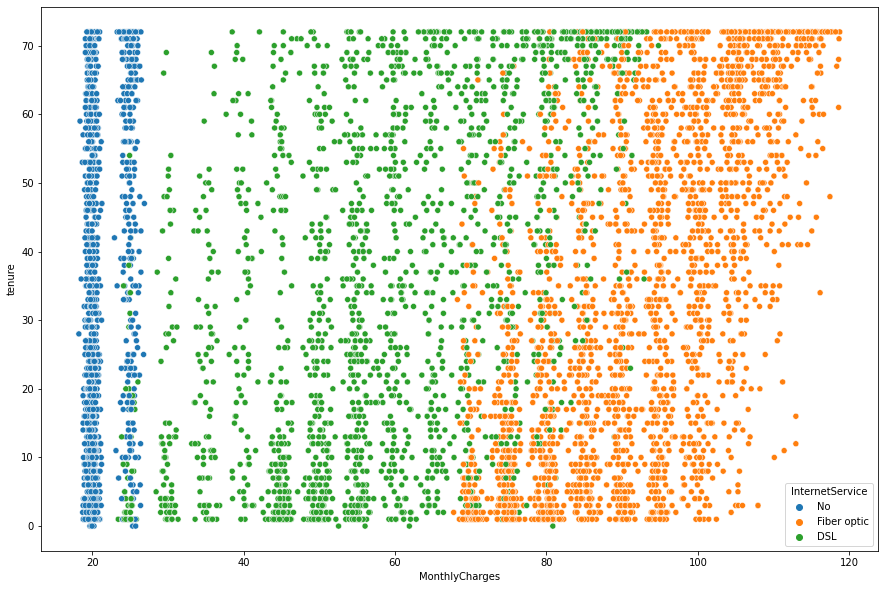

In [53]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = tel, x = 'MonthlyCharges',y = 'tenure', hue = 'InternetService')

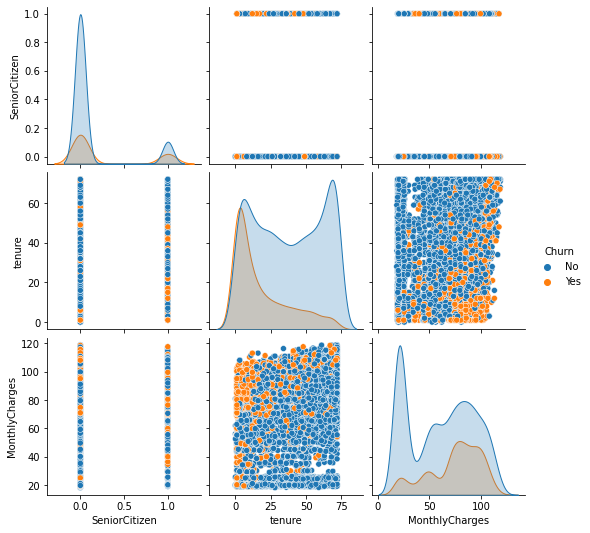

In [54]:
sns.pairplot(tel,hue = 'Churn')

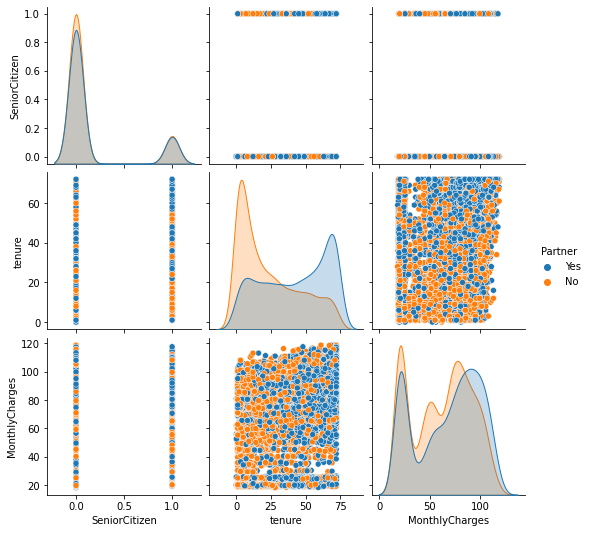

In [55]:
sns.pairplot(tel,hue = 'Partner')

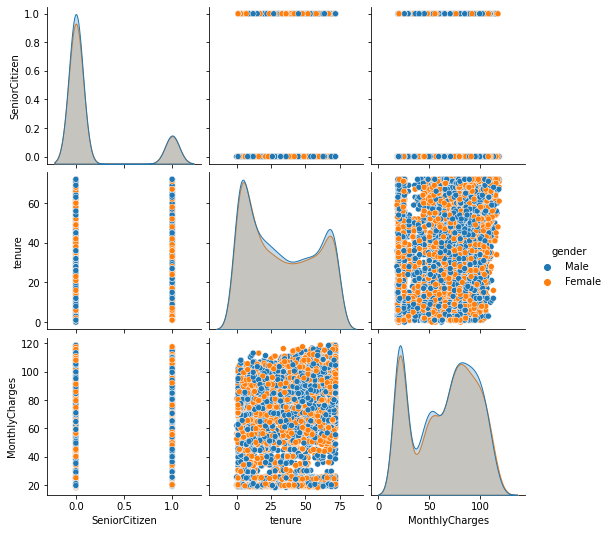

In [56]:
sns.pairplot(tel,hue = 'gender')

## 정의한 문제 해결하기

### 문제 1-4 해결하기
* df1~df4 사용

### 문제 5-8 해결하기
* df5~df8 사용

#### 문제5 은퇴한 사람들 중 종이 없이 비용을 지불하는 비율은 얼마인가
* SeniorCitizen ==1 인 샘플들 중에 PaperlessBilling 의 Yes/ No 비율을 비교. 
* 은퇴한 사람들일수록 나이가 많기 때문에, 종이를 사용한 비용 납부 비율이 더 클 것으로 예상

#### 문제5 결과
* 예상과 다르게, 은퇴한 고객도 종이를 사용하지 않고 지불하는 경우가 더 높았다. 
* 은퇴한 고객일수록 나이가 많기 때문에 종이를 사용한 납부 방식이 오히려 불편한 것으로 추정된다. 
* 종이를 사용하지 않는 고객이 종이를 사용하는 고객보다 3배 이상 많은 것을 알 수 있다. 

In [97]:
df5=df.copy()
df5=df5[df5['SeniorCitizen']=='1']

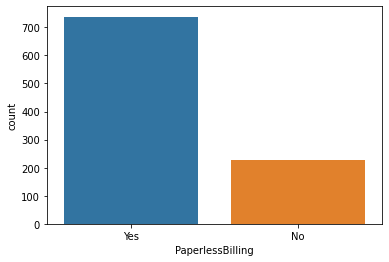

In [98]:
sns.countplot(x='PaperlessBilling', data=df5)

#### 문제6 PaperlessBilling 방식에 따른 지불 방식과, 각 지불 방식별 이탈 여부
* PaperlessBilling 별 PaymentMethod 와, 각 PaymentMethod 의 Churn 여부 분석. 
* 비용 지불 방법(PaymentMethod)이 고객 이탈 여부(Churn)에 영향이 있는 요소인지 알아보기 위함. 
* 자동화 방식일수록 고객 이탈 여부가 클 것으로 생각됨.

#### 문제6 결과
* 종이 사용여부와 관계없이, Electronic check(EC) 지불 방식을 사용하는 고객의 이탈 가능성이 가장 높다. 
* 특히, 종이를 사용하지 않고 지불하는 고객의 경우, EC 지불방식을 사용하는 고객 수가 많았지만, 그만큼 이탈율도 높다는 문제가 있다. 
* 종이를 사용하지 않고 지불하는 고객의 경우, Electronic check, Credit card(automatic), Bank transfer(automatic), Mailed check 순으로 고객이 이탈하지 않고 해당 통신사를 이용했다.
* 종이를 사용하여 지불하는 고객의 경우, Mailed check, Credit card(automatic), Bank transfer(automatic), Electronic chec 순으로 고객이 이탈하지 않고 해당 통신사를 이용했다. 
* 종이를 사용하지 않고 지불하는 고객과 비교해보면, Electronic check 방식으로 지불하는 고객이 종이를 사용하는 지불 고객의 경우 가장 사용하지 않는 방식이었지만, 종이를 사용하지 않고 지불하는 고객의 경우에는 가장 많이 사용하는 방식이었다. 
* Mailed check도 이와 비슷한 지불 방식으로, 종이를 사용하여 지불하는 고객에서는 가장 많이 사용하는 방식이지만, 종이를 사용하지 않고 지불하는 고객에게는 가장 덜 사용하는 방식으로 나타났다. 

In [99]:
df6=df.copy()

([<matplotlib.axis.XTick at 0x192753e9a88>,
 [Text(0, 0, 'Electronic \ncheck'),
  Text(0, 0, 'Mailed \ncheck'),
  Text(0, 0, 'Bank \ntransfer\n(automatic)'),
  Text(0, 0, 'Credit \ncard\n(automatic)')])

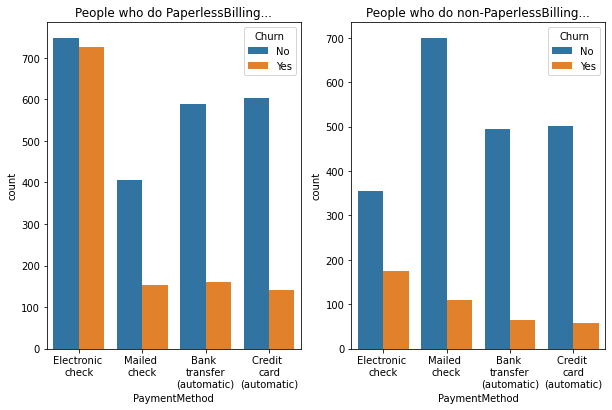

In [100]:
orderInd=['EC', 'MC', 'BT', 'CC']
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.title("People who do PaperlessBilling...")
sns.countplot(x='PaymentMethod', hue='Churn',data=df6[df6['PaperlessBilling']=='Yes'], order=orderInd)
plt.xticks([0,1,2,3],['Electronic \ncheck','Mailed \ncheck',
                      'Bank \ntransfer\n(automatic)','Credit \ncard\n(automatic)'])

plt.subplot(1,2,2)
plt.title("People who do non-PaperlessBilling...")
sns.countplot(x='PaymentMethod', hue='Churn',data=df6[df6['PaperlessBilling']=='No'], order=orderInd)
plt.xticks([0,1,2,3],['Electronic \ncheck','Mailed \ncheck',
                      'Bank \ntransfer\n(automatic)','Credit \ncard\n(automatic)'])

#### 문제7 MultipleLines 고객별 Churn 여부
* 여러 전화선을 연결해서 쓰고 있다면, 고객 이탈이 더 많을 것으로 예상.
* 여러 전화선을 가진 사람일수록 전화선을 통일하여 1 개 전화선만 쓸 가능성이 크기 때문

#### 문제7 결과
* 여러 전화선을 사용하는 여부가 고객 이탈 여부에 큰 영향을 미치지는 않지만, 여러 전화선을 이용하는 고객이 그렇지 않는 고객에 비해 3% 정도 높은 확률로 이탈할 수는 있다. 

In [106]:
df7= df.copy()

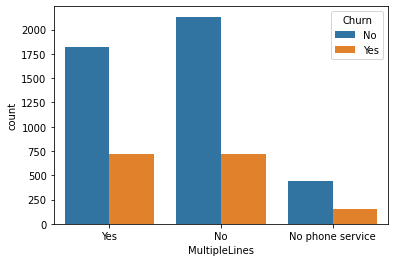

In [107]:
sns.countplot(x='MultipleLines', hue='Churn', data=df7)

In [108]:
YN=['Yes', 'No']
for i in YN:
    prob= df7[df7['MultipleLines']==i][df7['Churn']=='Yes']['Churn'].count()/df7[df7['MultipleLines']==i]['Churn'].count()
    print("MultipleLines가 "+i+"인 고객이 이탈할 확률은 "+str(int(prob*100))+"%이다. ")

MultipleLines가 Yes인 고객이 이탈할 확률은 28%이다. 
MultipleLines가 No인 고객이 이탈할 확률은 25%이다. 


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 문제8 계약 갱신 기간에 따른 고객 이탈 여부 파악하기
* Contract 종류에 따른 Churn 여부를 통해 알 수 있음
* 매달 계약을 갱신한다면, 다른 통신사로 바꿀 가능성이 크지만, 연 단위로 계약을 갱신하는 고객이라면 해당 통신사를 지속적으로 사용할 가능성이 높은 고객이라고 생각됨.

#### 문제8 결과
* 예상대로, 월단위로 계약을 갱신하는 고객이 연 단위 계약 갱신 고객보다 이탈율이 월등히 높다. 

In [113]:
df8=df.copy()

([<matplotlib.axis.XTick at 0x192755120c8>,
 [Text(0, 0, 'Month-to-month'),
  Text(0, 0, 'One year'),
  Text(0, 0, 'Two Year')])

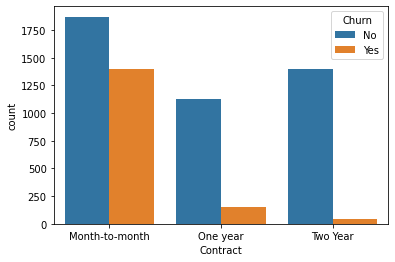

In [114]:
sns.countplot(x='Contract', hue='Churn', data=df8, order=['MM', 'OY', 'TY'])
plt.xticks([0,1,2],['Month-to-month','One year', 'Two Year'])

### 문제 9 해결하기
* df9 사용
* 머신러닝 모델 성능비교하기
* https://www.kaggle.com/mjain12/churn-prediction-classification 참고

#### 문제9 통신사 이탈 고객 예측 모델 성능 비교
* scikit-learn 의 Logistic Regression(시그모이드 함수 사용), KNN(유클리드 거리 기반), SVC(decision boundary 설정) 모델 3 개의 성능 비교한다.
* 서로 다른 기법을 사용하는 모델 3가지 성능을 비교하고 이탈 고객 예측 정확도가 0.8을 넘는 모델을 찾는다. 

#### 문제9 결과
* 로지스틱 회귀 모델이 3개 모델 중에서 이탈 고객 예측 정확도가 0.8이 넘는 모델이다. 
* 로지스틱 회귀> SVC> KNN 모델 순으로 앞에서부터 예측 정확도가 높다.
* confusion matrix의 2번째 행에서, 정답 클래스와 예측 클래스가 같은 경우보다 정답 클래스와 예측 클래스가 다른 경우가 더 많은 모델은, 이탈 고객 예측 정확도가 0.8보다 낮았다. 

In [59]:
df9=df.copy()
#taking care of categorical values
from sklearn.preprocessing import LabelEncoder

df9=df9.drop('customerID',axis=1) # 고객 ID 열은 예측에 사용하지 않으므로 제외
df9.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,TY,No,CC,24.10,1734.65,No
4528,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,MM,Yes,CC,88.15,3973.2,No
6344,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,MM,Yes,BT,74.95,2869.85,Yes
6739,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,MM,Yes,EC,55.90,238.5,No
432,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,MM,No,EC,53.45,119.5,No


In [60]:
le=LabelEncoder()
objList = list(df9.dtypes[df9.dtypes == object].index) # 자료형이 object인 칼럼들만 숫자형으로 변환 
for i in objList:
    df9[i]=le.fit_transform(df9[i])

In [61]:
df9.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1066,0
4528,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,2901,0
6344,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2126,1
6739,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,1733,0
432,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,308,0


In [62]:
# 속성값과 라벨값 분리 
x = df9.iloc[:, :-1]
y = df9.iloc[:, -1]

In [63]:
# training 셋과 test 셋 분리 
# 테스트 셋은 전체 데이터셋 중에서 20%로 지정. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) # 데이터 랜덤하게 섞기 

In [64]:
#training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) # 1000번 반복 
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

confusion matrix:
 [[800  95]
 [142 161]]
accuracy score =  0.8021702838063439


C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[769 126]
 [173 130]]
accuracy score =  0.7504173622704507


In [66]:
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[798  97]
 [156 147]]
accuracy score =  0.7888146911519198


<BarContainer object of 3 artists>

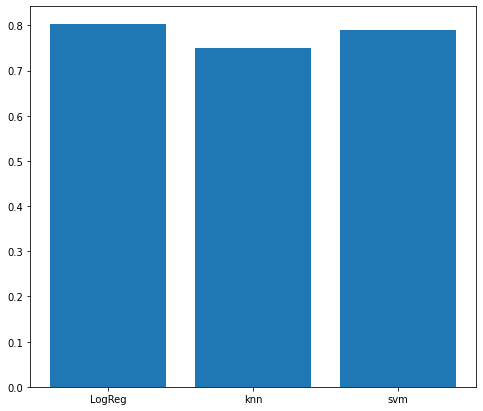

In [67]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,sva]
name = ['LogReg','knn','svm']
plt.bar(name,ac)

### 결론